## Data Understanding
***
The dataset originally comes from Kermany et al. on [Mendeley](https://data.mendeley.com/datasets/rscbjbr9sj/3). I downloaded the data from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) as it had already separated out the chest x-ray images from other data in the original dataset.

The following description is taken directly from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia):
>The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
>
>Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
>
>For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.


Kermany D, Goldbaum M, Cai W et al. Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. Cell. 2018; 172(5):1122-1131. doi:10.1016/j.cell.2018.02.010.

# Contents
1. Display Random images (maybe multiple?)
2. Examine Test/Val/Train distribution

In [31]:
# This autoreloads when importing modules or classes
%load_ext autoreload
%autoreload 2

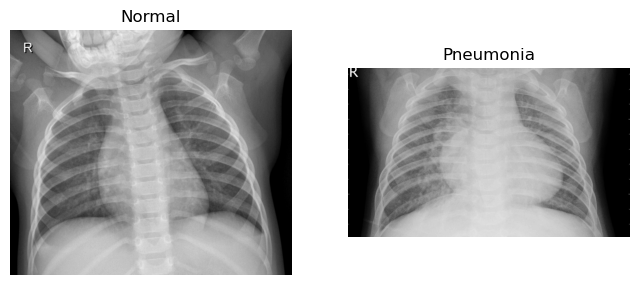

In [34]:
import os
import random
from PIL import Image
from IPython.display import display

def display_random_image(directory):
    """Display a random image from a specified directory inline in a Jupyter Notebook and return the image object."""
    # List all files in the directory
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    # Filter for common image extensions
    image_files = [f for f in files if f.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]
    
    if not image_files:
        print("No images found in the directory.")
        return None
    
    # Select a random image file
    random_image_path = os.path.join(directory, random.choice(image_files))
    
    # Open the image
    img = Image.open(random_image_path)

    return img  # Return the PIL image object for further manipulation or information if needed

normal_dir = 'data/chest_xray/train/NORMAL/'
pneumonia_dir = 'data/chest_xray/train/PNEUMONIA/'
rand_normal_image = display_random_image(normal_dir)
rand_pneumonia_image = display_random_image(pneumonia_dir)
# Display the image
fig, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].axis('off')
ax[0].imshow(rand_normal_image,cmap='gray')
ax[0].set_title("Normal")
ax[1].axis('off')
ax[1].imshow(rand_pneumonia_image,cmap='gray')
ax[1].set_title("Pneumonia")
plt.show()

In [32]:
from code.distribution_viz import prepare_plot
data_dir = "data/chest_xray"
folders = ['train', 'val', 'test']
df = prepare_plot(data_dir,folders)
df

,Dataset,Normal,Pneumonia,Total
0,train,1341,3875,5216
1,val,8,8,16
2,test,234,390,624


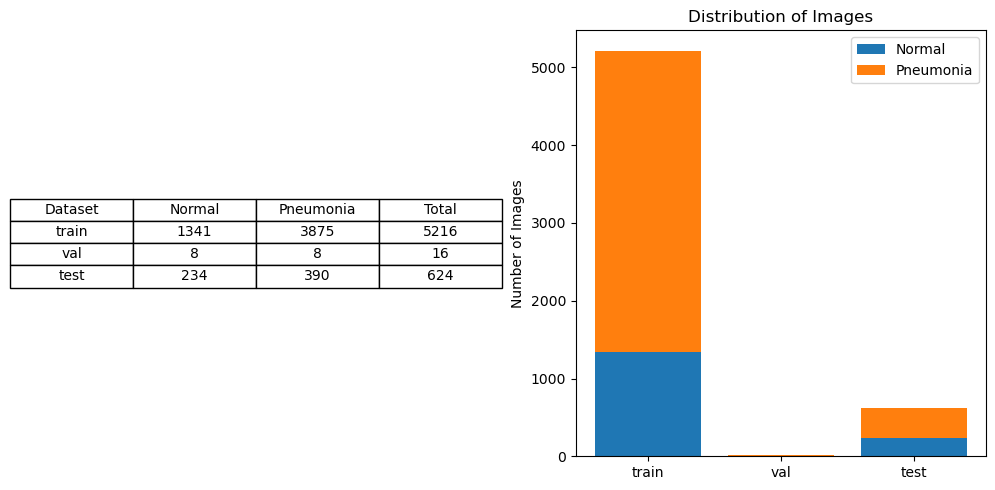

In [33]:
from code.distribution_viz import bars_data

bars_data(df)